<a href="https://colab.research.google.com/github/Mr-Moeen/image-preprocessing/blob/main/DL_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import google.colab.patches as cv2_imshow
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix



In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
type(x_train)

numpy.ndarray

In [7]:
print((x_train.shape, y_train.shape), (x_test.shape, y_test.shape))

((60000, 28, 28), (60000,)) ((10000, 28, 28), (10000,))


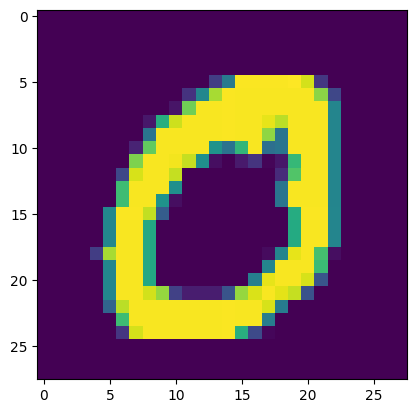

0


In [12]:
plt.imshow(x_train[51])
plt.show()
print((y_train[51]))


In [13]:
x_train= x_train/255
x_test= x_test/255

In [14]:
print(x_train[51])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [90]:
model = keras.Sequential([
    # Start with a Conv2D layer to process the image input
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output of the conv layers to feed into dense layers
    keras.layers.Flatten(),

    # Dense layers for further processing and deeper representation
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),

    # Output layer with softmax for multi-class classification
    keras.layers.Dense(10, activation='softmax')  # Changed to softmax for multi-class classification
])

In [91]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [93]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0123 - accuracy: 0.9959
Epoch 2/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0118 - accuracy: 0.9964
Epoch 3/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0088 - accuracy: 0.9971
Epoch 4/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0088 - accuracy: 0.9971
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0075 - accuracy: 0.9977
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0074 - accuracy: 0.9974
Epoch 7/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0061 - accuracy: 0.9981
Epoch 8/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0069 - accuracy: 0.9978
Epoch 9/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0064 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 44s 23m

In [94]:
loss, accuracy= model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0530 - accuracy: 0.9888


In [95]:
y_pred= model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [96]:
print(y_pred[0])

[7.6454210e-15 1.3256657e-07 4.5804192e-09 5.2454745e-11 1.4688573e-12
 3.7010153e-18 9.3530702e-18 9.9999982e-01 4.0685988e-12 4.3158348e-09]


In [97]:
label_test_images= np.argmax(y_pred[0])

In [98]:
y_pred_label= [np.argmax(i) for i in y_pred]
print(y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 9, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [99]:
conf_math= confusion_matrix(y_test, y_pred_label)
print(conf_math)

tf.Tensor(
[[ 975    0    1    0    0    0    0    1    2    1]
 [   0 1131    1    1    1    0    1    0    0    0]
 [   2    0 1024    0    0    0    0    4    2    0]
 [   0    0    3 1004    0    3    0    0    0    0]
 [   0    0    0    0  955    0    3    2    0   22]
 [   3    1    0    5    0  878    5    0    0    0]
 [   3    0    1    0    3    2  949    0    0    0]
 [   0    1    6    2    0    0    0 1014    1    4]
 [   3    0    3    5    1    1    1    0  959    1]
 [   0    0    0    2    2    3    0    0    3  999]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'predicted_labels')

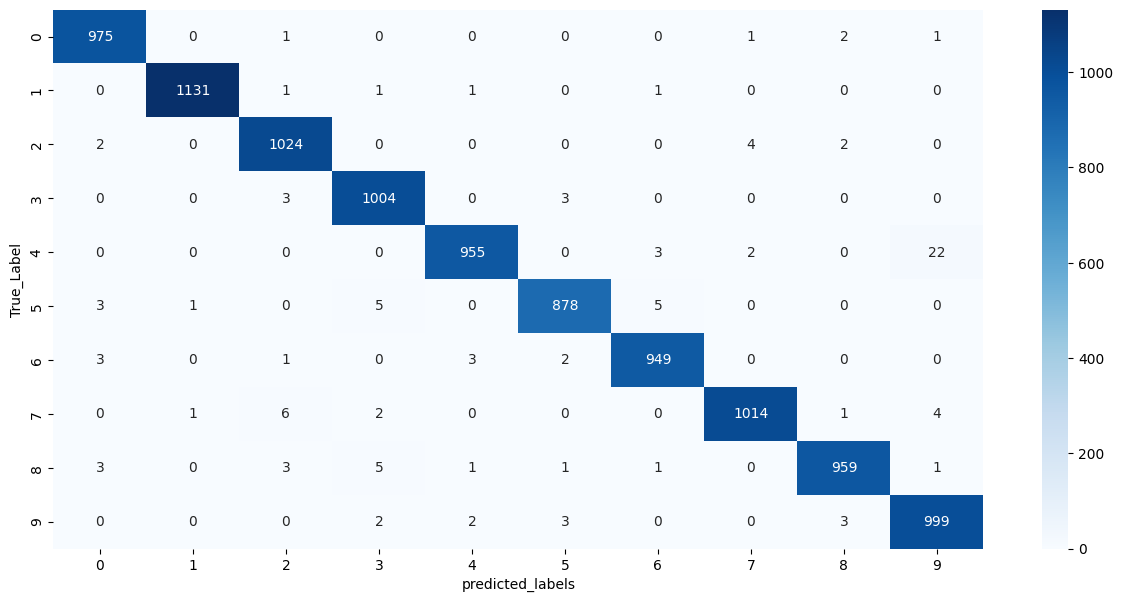

In [100]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_math, annot=True, fmt='d', cmap= 'Blues')
plt.ylabel('True_Label')
plt.xlabel('predicted_labels')

In [101]:
input_image_path= '/content/example_digit_8_187000.png'
input_image= cv2.imread(input_image_path)

In [102]:
type(input_image)

numpy.ndarray

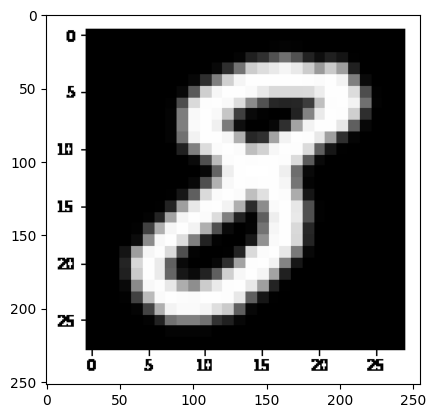

In [103]:
image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [140]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)



In [141]:
grayscale.shape

(252, 255)

In [106]:
Input_image_resize= cv2.resize(grayscale, (28,28))

In [107]:
Input_image_resize.shape

(28, 28)

In [108]:
from google.colab.patches import cv2_imshow
cv2_imshow(Input_image_resize)

In [109]:
Input_image_resize= Input_image_resize/255

In [110]:
image_reshape= np.reshape(Input_image_resize,[1,28,28])

In [111]:
imput_image= model.predict(image_reshape)
print(imput_image)

1/1 [==============================] - 0s 21ms/step
[[5.08730977e-07 8.96881527e-12 1.71214371e-04 1.18748815e-08
  6.72423298e-11 3.02127811e-12 4.52411442e-08 1.17617439e-12
  9.99828219e-01 4.10098836e-15]]


In [112]:
input_pred_label= np.argmax(imput_image)
print(input_pred_label)

8


In [ ]:
input_image_path = input('Input the path of the image: ')
input_image = cv2.imread(input_image_path)
if input_image is None:
    print("Error loading the image. Please check the path and try again.")
else:
    # Convert the image to RGB and grayscale
    image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
    grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Resize the grayscale image to 28x28 and normalize pixel values
    Input_image_resize = cv2.resize(grayscale, (28, 28)) / 255.0

    # Reshape the image to fit the model input
    image_reshape = np.reshape(Input_image_resize, [1, 28, 28, 1])  # Changed for CNN input shape

    # Predict the class
    imput_image = model.predict(image_reshape)
    input_pred_label = np.argmax(imput_image)
    print("Predicted Label:", input_pred_label)